<a href="https://colab.research.google.com/github/Manu87DS/Deep_Reinforcement_Learning/blob/main/EXAMPLE_REINFORCEMENT_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Example Cart Pole Game

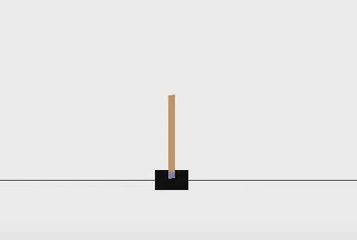

In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy #TM

In [ ]:
import pyvirtualdisplay
_display = pyvirtualdisplay.Display(visible=False,  # use False with Xvfb
                                    size=(1400, 900))
_ = _display.start()

In [ ]:
environment_name = "CartPole-v0" # ENV LOADING

In [ ]:
env = gym.make(environment_name)

In [ ]:
episodes = 5
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action) # unpacking of value from env.step
        score+=reward  # reward cumulating
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

Episode:1 Score:21.0
Episode:2 Score:23.0
Episode:3 Score:38.0
Episode:4 Score:11.0
Episode:5 Score:18.0


In [ ]:
env.close()

In [ ]:
env.step(1)   # 0 <=> reward / True <=> episode is done

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


(array([ 0.09378349,  0.19263231, -0.22622805, -0.93913721]), 0.0, True, {})

In [ ]:
env.observation_space.sample()

array([-2.2554169e+00, -1.5737129e+38,  3.2293218e-01, -3.3682683e+37],
      dtype=float32)

In [ ]:
env.action_space # Understand env

Discrete(2)

In [ ]:
env.action_space.sample() # sample() is an inbuilt function of random module in Python that returns a particular length list of items chosen from the sequence 

1

In [ ]:
env.observation_space

Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)

In [ ]:
env.observation_space.sample()  # Cart Position , Cart Velocity, Pole Angle, Pole Angular Velocity

array([-2.1783667e+00,  3.1691448e+38, -4.0698892e-01, -9.8657773e+36],
      dtype=float32)

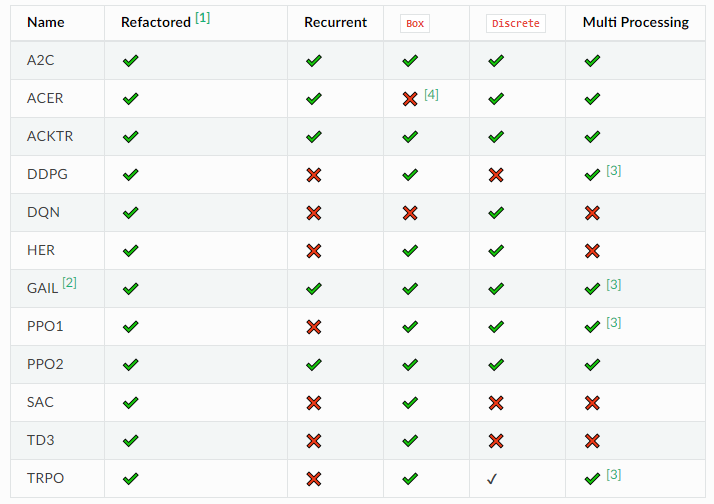

In [ ]:
env = gym.make(environment_name)
env = DummyVecEnv([lambda: env])
# Mlp <=> multi layer perceptron
model = PPO('MlpPolicy', env, verbose = 1, tensorboard_log=log_path)

Using cpu device


In [ ]:
PPO??

In [ ]:
model.learn(total_timesteps=20000)

Logging to /content/drive/MyDrive/Colab Notebooks/34_REINFORCEMENT LEARNING/COURS Nicholas Renotte/Training/Logs/PPO_4
-----------------------------
| time/              |      |
|    fps             | 503  |
|    iterations      | 1    |
|    time_elapsed    | 4    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 643         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008986385 |
|    clip_fraction        | 0.0844      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | 0.00208     |
|    learning_rate        | 0.0003      |
|    loss                 | 6.86        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0127     |

In [ ]:
# del model

In [ ]:
#model = PPO.load('PPO_model', env=env)

In [ ]:
### MODEL EVALUATION
evaluate_policy(model, env, n_eval_episodes=10, render=False)  #render=True

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


(200.0, 0.0)

In [ ]:
env.close()

In [ ]:
model.predict(obs)

(array([1]), None)

In [ ]:
action, _=model.predict(obs)
action

array([0])

In [ ]:
episodes = 5
for episode in range(1, episodes+1):
    obs = env.reset()  #
    done = False
    score = 0 
    
    while not done:
        env.render()
        action, _ = model.predict(obs) ## _
        obs, reward, done, info = env.step(action) # 
        score+=reward  # reward cumulating
    print('Episode:{} Score:{}'.format(episode, score))

Episode:1 Score:[200.]
Episode:2 Score:[200.]
Episode:3 Score:[200.]
Episode:4 Score:[200.]
Episode:5 Score:[200.]


In [ ]:
env.reset() # observations

array([[-0.03237478, -0.02234248,  0.04327907,  0.03828494]],
      dtype=float32)

In [ ]:
obs = env.reset()
obs

array([[ 0.04352141, -0.01341686, -0.0055206 , -0.00059058]],
      dtype=float32)

In [ ]:
#model.predict??
model.predict(obs)  # based on observation : model orientates to action 1

(array([1]), None)

In [ ]:
env.action_space.sample()

0

In [ ]:
env.step(action)

(array([[ 0.04325307, -0.2084592 , -0.00553241,  0.29034543]],
       dtype=float32), array([1.], dtype=float32), array([False]), [{}])

In [ ]:
obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)  #Reward is 1 for every step taken, including the termination step
    env.render()
    if done: 
        print('info', info)
        break

info [{'TimeLimit.truncated': True, 'terminal_observation': array([ 0.4780474 ,  0.38323928,  0.01509949, -0.40545228])}]


In [ ]:
env.close()

In [ ]:
# cALLBACK IMPLEMENTATION
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
import os

In [ ]:
save_path = os.path.join('Training', 'Saved Models')
log_path = os.path.join('Training', 'Logs')

In [ ]:
env = gym.make(environment_name)
env = DummyVecEnv([lambda: env])

In [ ]:
stop_callback = StopTrainingOnRewardThreshold(reward_threshold=190, verbose=1)
eval_callback = EvalCallback(env, 
                             callback_on_new_best=stop_callback, 
                             eval_freq=10000, 
                             best_model_save_path=save_path, 
                             verbose=1)

In [ ]:
model = PPO('MlpPolicy', env, verbose = 1, tensorboard_log=log_path)

Using cpu device


In [ ]:
model.learn(total_timesteps=20000, callback=eval_callback)

Logging to Training/Logs/PPO_1
-----------------------------
| time/              |      |
|    fps             | 1582 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1137        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009334202 |
|    clip_fraction        | 0.111       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.685      |
|    explained_variance   | -0.000768   |
|    learning_rate        | 0.0003      |
|    loss                 | 8.3         |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0168     |
|    value_loss           | 56.1        |
-----------------------------------------
---

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


Eval num_timesteps=10000, episode_reward=180.00 +/- 33.88
Episode length: 180.00 +/- 33.88
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 180         |
|    mean_reward          | 180         |
| time/                   |             |
|    total timesteps      | 10000       |
| train/                  |             |
|    approx_kl            | 0.009017279 |
|    clip_fraction        | 0.0641      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.614      |
|    explained_variance   | 0.307       |
|    learning_rate        | 0.0003      |
|    loss                 | 14.2        |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.0164     |
|    value_loss           | 55.5        |
-----------------------------------------
New best mean reward!
------------------------------
| time/              |       |
|    fps             | 933   |
|    iterations      | 5     |
|    ti

In [ ]:
model_path = os.path.join('Training', 'Saved Models', 'best_model')
model = PPO.load(model_path, env=env)

In [ ]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


(200.0, 0.0)

In [ ]:
# Policy change
net_arch=[dict(pi=[128, 128, 128, 128], vf=[128, 128, 128, 128])]

In [ ]:
model = PPO('MlpPolicy', env, verbose = 1, policy_kwargs={'net_arch': net_arch})

Using cpu device


In [ ]:
model.learn(total_timesteps=20000, callback=eval_callback)

-----------------------------
| time/              |      |
|    fps             | 1363 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 861          |
|    iterations           | 2            |
|    time_elapsed         | 4            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0129930675 |
|    clip_fraction        | 0.155        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.683       |
|    explained_variance   | 0.00207      |
|    learning_rate        | 0.0003       |
|    loss                 | 3.47         |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.0184      |
|    value_loss           | 20.2         |
------------------------------------------
----------------

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


Eval num_timesteps=10000, episode_reward=200.00 +/- 0.00
Episode length: 200.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 200         |
|    mean_reward          | 200         |
| time/                   |             |
|    total timesteps      | 10000       |
| train/                  |             |
|    approx_kl            | 0.012741004 |
|    clip_fraction        | 0.149       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.573      |
|    explained_variance   | 0.554       |
|    learning_rate        | 0.0003      |
|    loss                 | 9.95        |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.0191     |
|    value_loss           | 36.9        |
-----------------------------------------
------------------------------
| time/              |       |
|    fps             | 676   |
|    iterations      | 5     |
|    time_elapsed    | 15    |


In [ ]:
# Algorithm change
from stable_baselines3 import DQN #storage mechanism and separate target

In [ ]:
model = DQN('MlpPolicy', env, verbose = 1, tensorboard_log=log_path)

Using cpu device


In [ ]:
model.learn(total_timesteps=20000, callback=eval_callback)

Logging to Training/Logs/DQN_1
----------------------------------
| rollout/            |          |
|    exploration rate | 0.952    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 3084     |
|    time_elapsed     | 0        |
|    total timesteps  | 101      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.915    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 3807     |
|    time_elapsed     | 0        |
|    total timesteps  | 178      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.87     |
| time/               |          |
|    episodes         | 12       |
|    fps              | 4209     |
|    time_elapsed     | 0        |
|    total timesteps  | 273      |
----------------------------------
------------------------

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 468      |
|    fps              | 5096     |
|    time_elapsed     | 2        |
|    total timesteps  | 10371    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 472      |
|    fps              | 5097     |
|    time_elapsed     | 2        |
|    total timesteps  | 10462    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 476      |
|    fps              | 5089     |
|    time_elapsed     | 2        |
|    total timesteps  | 10539    |
----------------------------------
----------------------------------
| rollout/          

In [ ]:
dqn_path = os.path.join('Training', 'Saved Models', 'DQN_model')

In [ ]:
model.save(dqn_path)

In [ ]:
model = DQN.load(dqn_path, env=env)

In [ ]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


(16.5, 12.387493693237547)

In [ ]:
env.close()